# Imports and Dependencies

In [4]:
!pip install --upgrade pip setuptools wheel

In [5]:
!pip install KNearestNeighborSampling

In [6]:
import KNearestNeighborSampling

In [7]:
import KNearestNeighborSampling
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### Import Dataset

In [8]:
# Get dataset & Convert labels to integers
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(int)

# Limit dataset size to 10000
X = mnist.data.iloc[:10000, :]
y = mnist.target[:10000].tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Functions

In [12]:
# used for dimension reduction for 2D visualization of multidimensional vector data
def get_embeddings_BH_tNSE(df, n_components=2, init_solution='random', random_state=0, perplexity=5):
  tsne = TSNE(n_components=n_components, method='barnes_hut', init=init_solution, random_state=random_state)
  train_sample_embedded = tsne.fit_transform(df)
  return train_sample_embedded

# Using KNN-Sampling

In [9]:
# Sample representatives to further reduce the size of dataset
train_samples = KNearestNeighborSampling.KNNSampler.sample(X, k=10, dynamic_sampling=False)
print(X.shape)
print(train_samples.shape)

Warning Trying to delete Key that do not exist [8941] not found in axis
Warning Trying to delete Key that do not exist [8359] not found in axis
Warning Trying to delete Key that do not exist [9841, 2813] not found in axis
Warning Trying to delete Key that do not exist [490] not found in axis
Warning Trying to delete Key that do not exist [9328, 9933, 1286, 912, 419] not found in axis
Warning Trying to delete Key that do not exist [8406, 3670, 4312] not found in axis
Warning Trying to delete Key that do not exist [8431] not found in axis
Warning Trying to delete Key that do not exist [4168, 94, 1713, 1749, 9950, 8938, 5405, 823, 9041, 1490] not found in axis
Warning Trying to delete Key that do not exist [4022, 1848, 7494, 96] not found in axis
Warning Trying to delete Key that do not exist [2082, 7838, 166, 9947, 1280, 7485] not found in axis
Warning Trying to delete Key that do not exist [8851, 3101, 3357, 7725, 9780, 2501, 9041, 3307, 4341] not found in axis
Warning Trying to delete 

# Plotting Sampled Data

In [10]:
try:
  train_samples['idx'] = train_samples['idx'].astype(int)
  train_samples_indices = train_samples['idx'].tolist()      # useful for plotting scatter graph
  train_samples.drop(columns=['idx'], inplace=True)
except KeyError as ke:
  print("Column is Already Dropped and Saved", ke.args[0])

In [13]:
# reduce dimension for plotting vectors in 2D
train_sample_embeddings = get_embeddings_BH_tNSE(train_samples, n_components=2, init_solution='random', random_state=0, perplexity=5)

In [14]:
# plot the 2D sampled data with 0-9 labels (labels are the dependent variable of the dataset)
labels = []
for i in train_samples_indices:
  labels.append(y[i])

label_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray']

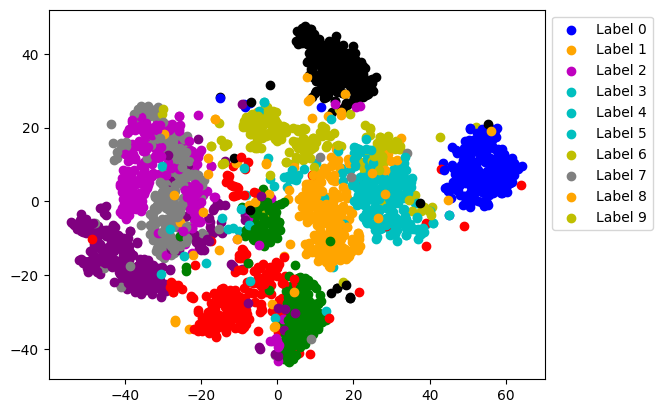

In [15]:
# Create a scatter plot with different colors for each label
for i in range(len(labels)):
    label = labels[i]
    x = train_sample_embeddings[i, 0]
    y = train_sample_embeddings[i, 1]
    plt.scatter(x, y, c=label_colors[label])

# Add a legend to the plot
plt.legend(labels=[f'Label {i}' for i in range(10)], loc='upper left', bbox_to_anchor=(1, 1))

# Show the scatter plot
plt.show()